In [1]:
#employee salary prediction by using adult csv
#load your libraries
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv(r"adult 3.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
data.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [7]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [8]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [9]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
data.age.value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [11]:
data.occupation.replace({'?':'other'},inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_16332\3644256424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'other'},inplace=True)


In [12]:
data.workclass.replace({'?':'not listed'},inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_16332\4152459012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'not listed'},inplace=True)


In [13]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
other                2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [14]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
not listed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [15]:
data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']

In [16]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
not listed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [17]:
data.shape

(48811, 15)

In [18]:
data = data[data['education']!='5th-6th']
data = data[data['education']!='1st-4th']
data = data[data['education']!='Preschool']

In [19]:
data.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

In [20]:
data.shape

(47972, 15)

In [21]:
#redunduncy
data.drop(columns='education',inplace=True)

In [22]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,not listed,103497,10,Never-married,other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
data['native-country'].value_counts()

native-country
United-States                 43556
?                               830
Mexico                          601
Philippines                     277
Germany                         206
Canada                          181
Puerto-Rico                     171
India                           150
England                         125
Cuba                            125
China                           117
South                           114
El-Salvador                     106
Jamaica                         104
Japan                            91
Italy                            89
Dominican-Republic               86
Poland                           86
Columbia                         81
Vietnam                          80
Haiti                            67
Guatemala                        65
Taiwan                           65
Iran                             59
Portugal                         57
Greece                           48
Peru                             46
Nicaragua    

In [24]:
data['hours-per-week'].min()

np.int64(1)

In [25]:
data['hours-per-week'].max()

np.int64(99)

In [26]:
data['educational-num'].value_counts()

educational-num
9     15768
10    10873
13     8025
14     2657
11     2061
7      1809
12     1599
6      1387
4       952
15      834
5       756
8       657
16      594
Name: count, dtype: int64

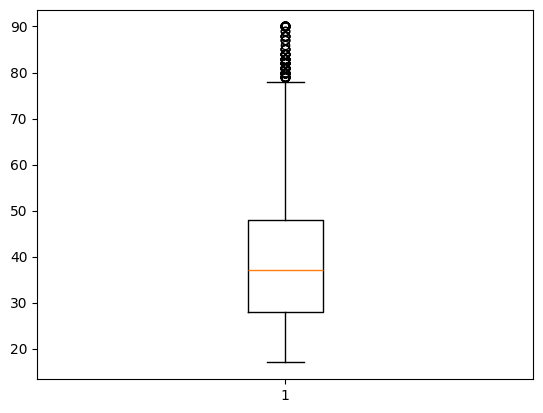

In [27]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()


In [28]:
data = data[(data['age']<=75) & (data['age']>=17)]

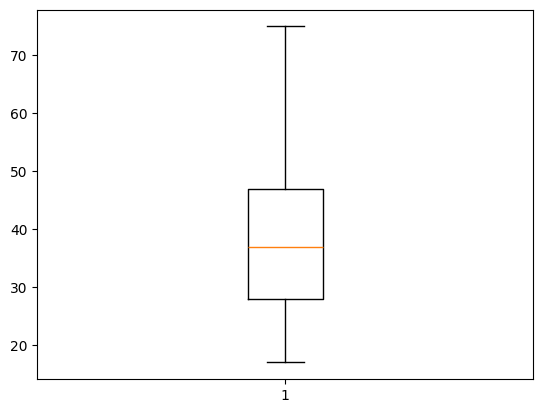

In [29]:
plt.boxplot(data['age'])
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['workclass'] = encoder.fit_transform(data['workclass'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['gender'] = encoder.fit_transform(data['gender'])
data['native-country'] = encoder.fit_transform(data['native-country'])
data

C:\Users\gaura\AppData\Local\Temp\ipykernel_16332\2770357596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'] = encoder.fit_transform(data['workclass'])
C:\Users\gaura\AppData\Local\Temp\ipykernel_16332\2770357596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital-status'] = encoder.fit_transform(data['marital-status'])
C:\Users\gaura\AppData\Local\Temp\ipykernel_16332\2770357596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,39,>50K
3,44,2,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,6,103497,10,4,14,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,39,<=50K
48838,40,2,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,2,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,2,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [31]:
data['native-country'].value_counts()

native-country
39    43234
0       824
26      601
30      276
11      206
2       177
33      170
19      150
5       123
9       122
3       116
35      111
8       105
23      104
24       91
22       88
6        85
31       84
4        81
40       80
14       67
13       65
36       65
20       59
32       55
12       47
29       46
27       44
7        41
10       38
21       37
37       29
17       28
1        26
38       26
28       23
41       22
34       20
25       19
18       17
16       16
15        1
Name: count, dtype: int64

In [32]:
data['marital-status'].value_counts()

marital-status
2    21768
4    15850
0     6563
5     1481
6     1352
3      568
1       37
Name: count, dtype: int64

In [33]:
data['occupation'].value_counts()

occupation
9     6129
3     6024
2     5990
0     5559
11    5442
7     4715
6     2869
14    2639
13    2294
5     1975
12    1444
4     1353
10     973
8      198
1       15
Name: count, dtype: int64

In [34]:
data.drop(['relationship','race', 'native-country', 'fnlwgt'], axis=1, inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_16332\2216995994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['relationship','race', 'native-country', 'fnlwgt'], axis=1, inplace=True)


In [35]:
x = data.drop(columns=['income']) #input
y = data['income'] #output

In [36]:
x

,age,workclass,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week
0,25,2,7,4,6,1,0,0,40
1,38,2,9,2,4,1,0,0,50
2,28,1,12,2,10,1,0,0,40
3,44,2,10,2,6,1,7688,0,40
4,18,6,10,4,14,0,0,0,30
...,...,...,...,...,...,...,...,...,...
48837,27,2,12,2,12,0,0,0,38
48838,40,2,9,2,6,1,0,0,40
48839,58,2,9,6,0,0,0,0,40
48840,22,2,9,4,0,1,0,0,20


In [37]:
data

,age,workclass,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,25,2,7,4,6,1,0,0,40,<=50K
1,38,2,9,2,4,1,0,0,50,<=50K
2,28,1,12,2,10,1,0,0,40,>50K
3,44,2,10,2,6,1,7688,0,40,>50K
4,18,6,10,4,14,0,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,2,12,2,12,0,0,0,38,<=50K
48838,40,2,9,2,6,1,0,0,40,>50K
48839,58,2,9,6,0,0,0,0,40,<=50K
48840,22,2,9,4,0,1,0,0,20,<=50K


In [38]:
data['capital-gain'].value_counts()

capital-gain
0        43674
15024      513
7688       408
7298       361
99999      241
         ...  
1111         1
6097         1
1639         1
18481        1
2387         1
Name: count, Length: 122, dtype: int64

In [39]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47619, dtype: object

In [40]:
#scaling(min-max scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x
#became array

array([[0.13793103, 0.33333333, 0.25      , ..., 0.        , 0.        ,
        0.39795918],
       [0.36206897, 0.33333333, 0.41666667, ..., 0.        , 0.        ,
        0.5       ],
       [0.18965517, 0.16666667, 0.66666667, ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.70689655, 0.33333333, 0.41666667, ..., 0.        , 0.        ,
        0.39795918],
       [0.0862069 , 0.33333333, 0.41666667, ..., 0.        , 0.        ,
        0.19387755],
       [0.60344828, 0.5       , 0.41666667, ..., 0.1502415 , 0.        ,
        0.39795918]])

In [41]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [54]:
y_train.value_counts()

income
<=50K    28823
>50K      9272
Name: count, dtype: int64

In [55]:
y_test.value_counts()

income
<=50K    7206
>50K     2318
Name: count, dtype: int64

In [42]:
data.shape

(47619, 10)

In [43]:
x_train

array([[0.48275862, 0.83333333, 0.5       , ..., 0.        , 0.        ,
        0.39795918],
       [0.18965517, 0.33333333, 0.5       , ..., 0.        , 0.        ,
        0.39795918],
       [0.65517241, 0.33333333, 0.25      , ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.37931034, 0.33333333, 0.41666667, ..., 0.        , 0.        ,
        0.60204082],
       [0.32758621, 0.33333333, 0.75      , ..., 0.        , 0.        ,
        0.39795918],
       [0.0862069 , 0.33333333, 0.41666667, ..., 0.        , 0.        ,
        0.39795918]])

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

# ✅ Train the model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# ✅ Save the trained model
with open('KNeighborsClassifier.pkl', 'wb') as file:
    pickle.dump(knn, file)


In [45]:
#model training by logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
best_solver = ''
test_score = np.zeros(6)

for i,n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(x_train,y_train)
    test_score[i] = lr.score(x_test,y_test)
    if lr.score(x_test,y_test) == test_score.max():
        best_solver = n

lr = LogisticRegression(solver=best_solver)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(best_solver)
print("logisticregression score = ",accuracy_score(y_test,lr_pred))

liblinear
logisticregression score =  0.8187736245275095


In [46]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
mlp.fit(x_train,y_train)
predict2 = mlp.predict(x_test)
predict2

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [47]:
score1 = accuracy_score(y_test,predict2)
score1

0.8443931121377573

In [48]:
#by using support vector machine
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear' : 0 , 'poly' : 0 , 'rbf' : 0 , 'sigmoid' : 0}
best = ''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(x_train,y_train)
    pred = svm.predict(x_test)
    kernels[i] = f1_score(y_test,pred,average='weighted')

    if kernels[i] == max(kernels.values()):
        best = i

svm = SVC(kernel=best)
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
print(best)
print('svm score = ',f1_score(y_test,svm_pred,average='weighted'))


rbf
svm score =  0.8338838382927414


In [49]:
# by using decision tree classifire
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state' : [0,42]
}
grid_search = GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(x_train,y_train)
ctree = DecisionTreeClassifier(**grid_search.best_params_,class_weight='balanced')
ctree.fit(x_train,y_train)
dtc_pred = ctree.predict(x_test)
print('Decision tree accuracy = ',accuracy_score(dtc_pred,y_test))

Decision tree accuracy =  0.7993490130197396


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print('Gradient Boosting Classifier accuracy = ',accuracy_score(predictions,y_test))

Gradient Boosting Classifier accuracy =  0.864867702645947


In [51]:
#by using random forest classifire
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [50,100],
    'max_features' : ['sqrt','log2',None],
    'max_depth' : [3,6],
    'max_leaf_nodes' : [3,6]
}

grid_search = GridSearchCV(rfc,param_grid)
grid_search.fit(x_train,y_train)
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(x_train,y_train)
rfc_pred = rfctree.predict(x_test)
print('Random forest classifier accuracy = ',accuracy_score(y_test,rfc_pred))

Random forest classifier accuracy =  0.8436581268374632


In [52]:
import pickle
file = open('RandomForestClassifier.pkl','wb')
pickle.dump(rfctree,file)
file = open('LogisticRegression.pkl','wb')
pickle.dump(lr,file)
file = open('DecisionTree.pkl','wb')
pickle.dump(ctree,file)
file = open('GradientBoostingClassifier.pkl','wb')
pickle.dump(model,file)
file = open('SupportVectorMachine.pkl','wb')
pickle.dump(svm,file)
file = open('MLPClassifier.pkl','wb')
pickle.dump(mlp,file)

In [53]:
print(y_test.value_counts())


income
<=50K    7206
>50K     2318
Name: count, dtype: int64
